In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

Let's start by checking the number of training and test images included in the competition dataset.

In [10]:
!ls ../data/train/ | wc -l

9912


In [11]:
!ls ../data/test | wc -l

8


Interesting, there are only 8 images in the test dataset. This is because the real test dataset is actually help private and only used from the competition organizers to compute Public and Private Leaderboard scores.

> In addition to the training data, we include some randomly generated example test data to help you author submission code. When your submitted notebook is scored, this example data will be replaced by the actual test data (including the sample submission).

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

In [3]:
df.Pawpularity.describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

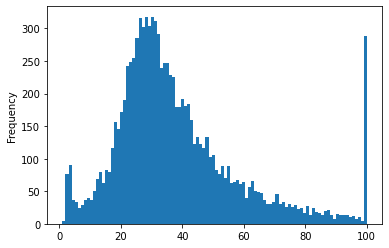

In [17]:
df.Pawpularity.plot.hist(bins=100)

The response variable is clearly not normally distributed. There are quite a lot of 100 scores a significant amount of low scores too.

In [33]:
sorted_ids = df.sort_values('Pawpularity', ascending=False).Id.tolist()

In [38]:
df.sort_values('Pawpularity', ascending=False)[["Id", "Pawpularity"]]

Id  Pawpularity
6930  b2eed3052c0e2d8965dfea7b50d04676          100
7265  bb018056345d6332499b0640196a2359          100
9519  f5e841dbe4a37954cd762022af45896b          100
8347  d82afe0c787d654fc4a7be069e8cba9b          100
2926  4b969d7a5e55de08660c6affb8dcf04c          100
...                                ...          ...
8320  d761e75d1f9ca9c476fdbcea1018d8c5            2
8674  e0a1efdaf4fbed8659b6d23994ee346e            1
3232  53b536999aecd800cfda720f3ca363cb            1
2442  3ed899a8334a8e5c74f4a554f3ce6f08            1
4235  6c159aede3df25fdbe781431aabcfc67            1

[9912 rows x 2 columns]

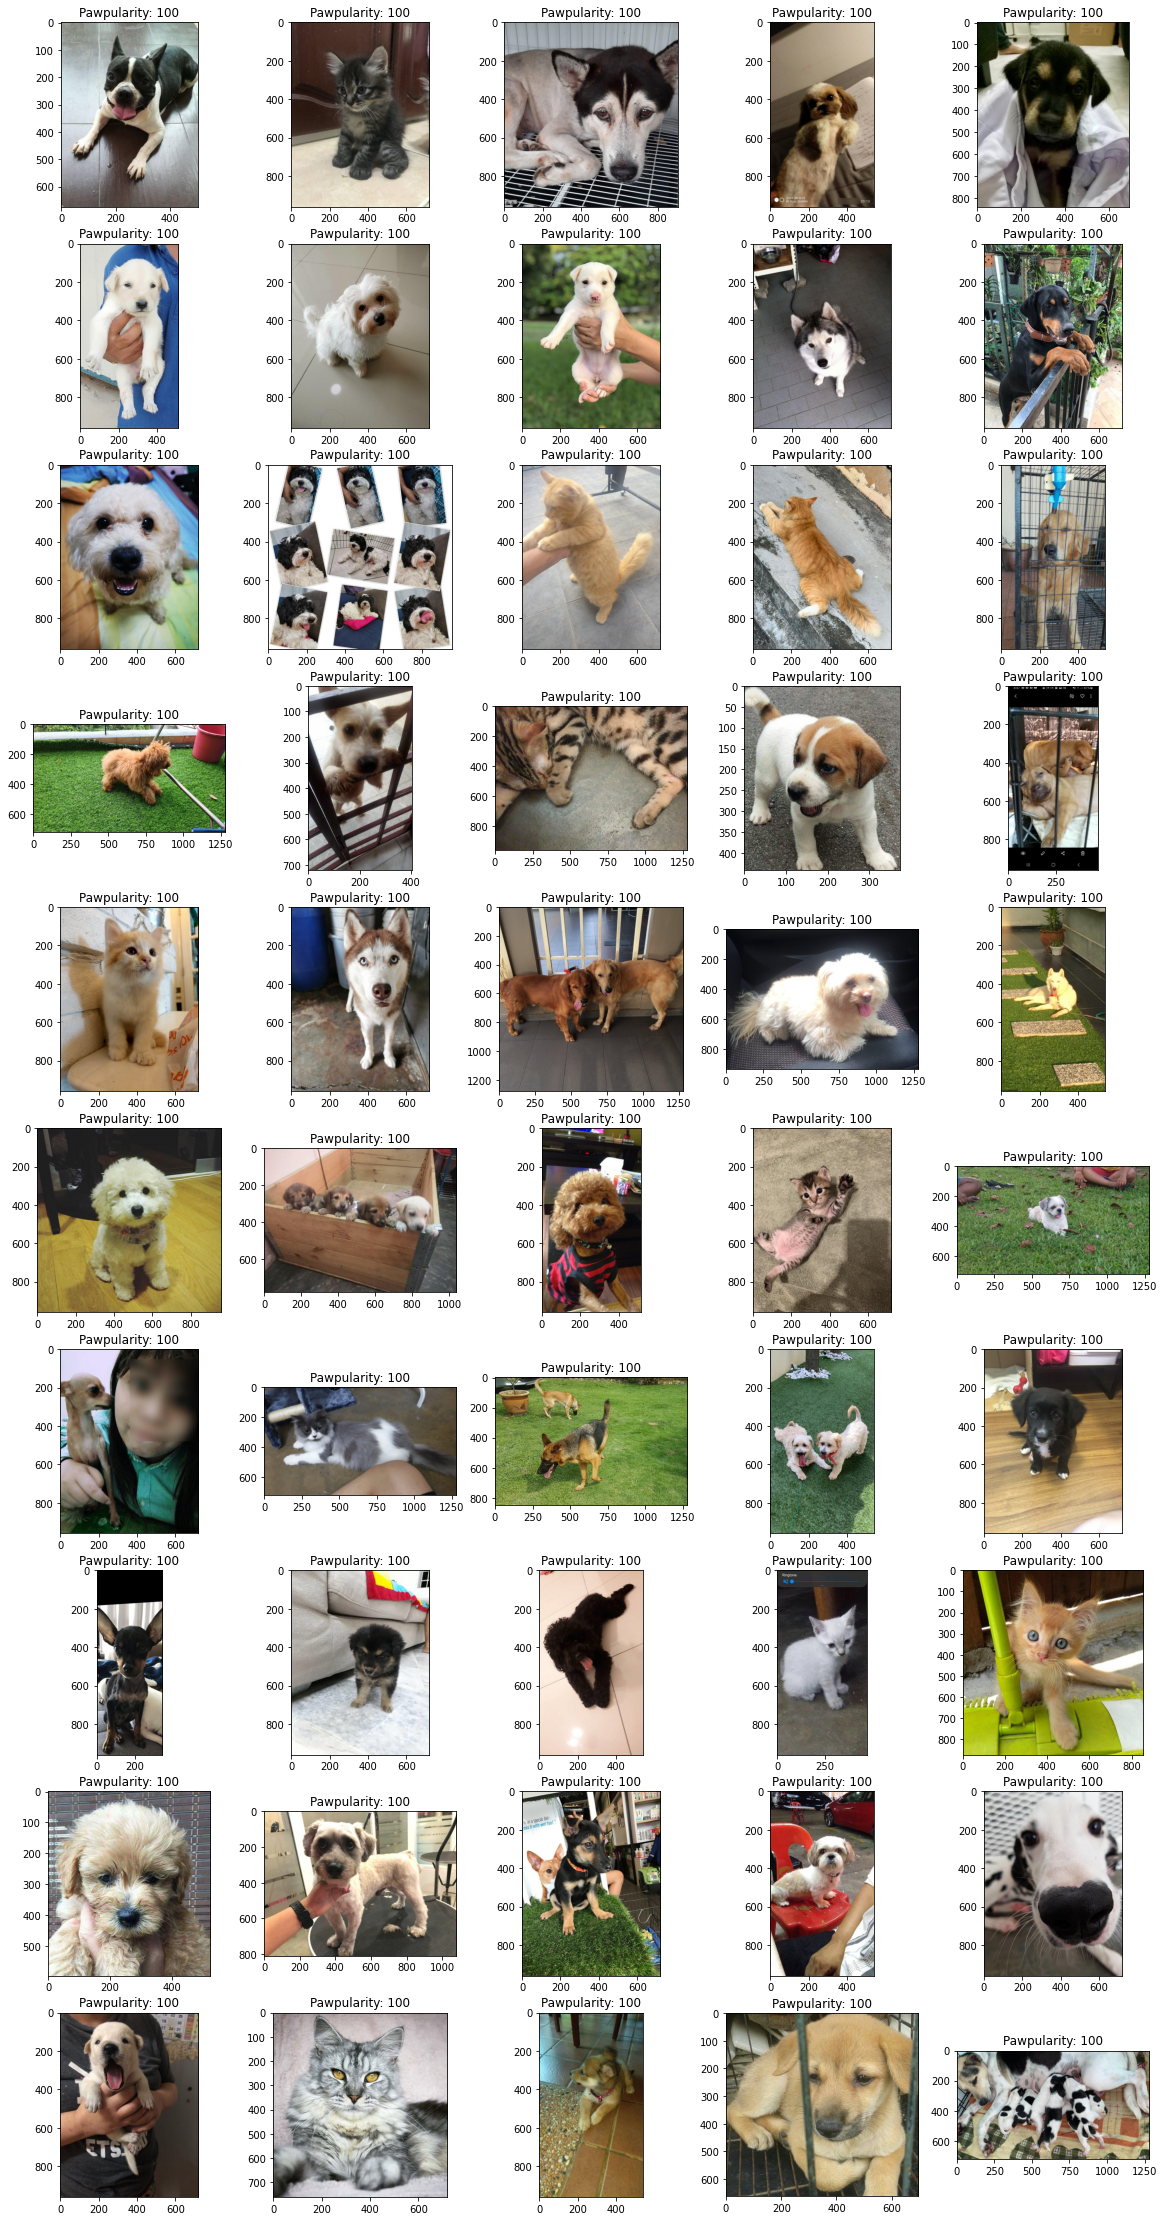

In [150]:
n_images = 50
n_cols = 5
n_rows = int(n_images / n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,40))

i = 0
for idx, record in df.sort_values('Pawpularity', ascending=False)[["Id", "Pawpularity"]].head(n_images).iterrows():
    img = Image.open(f"../data/train/{record.Id}.jpg")
    
    row, col = int(i / n_cols), i % n_cols
    
    ax[row, col].set_title(f"Pawpularity: {record.Pawpularity}")
    ax[row, col].imshow(img)
    
    i += 1

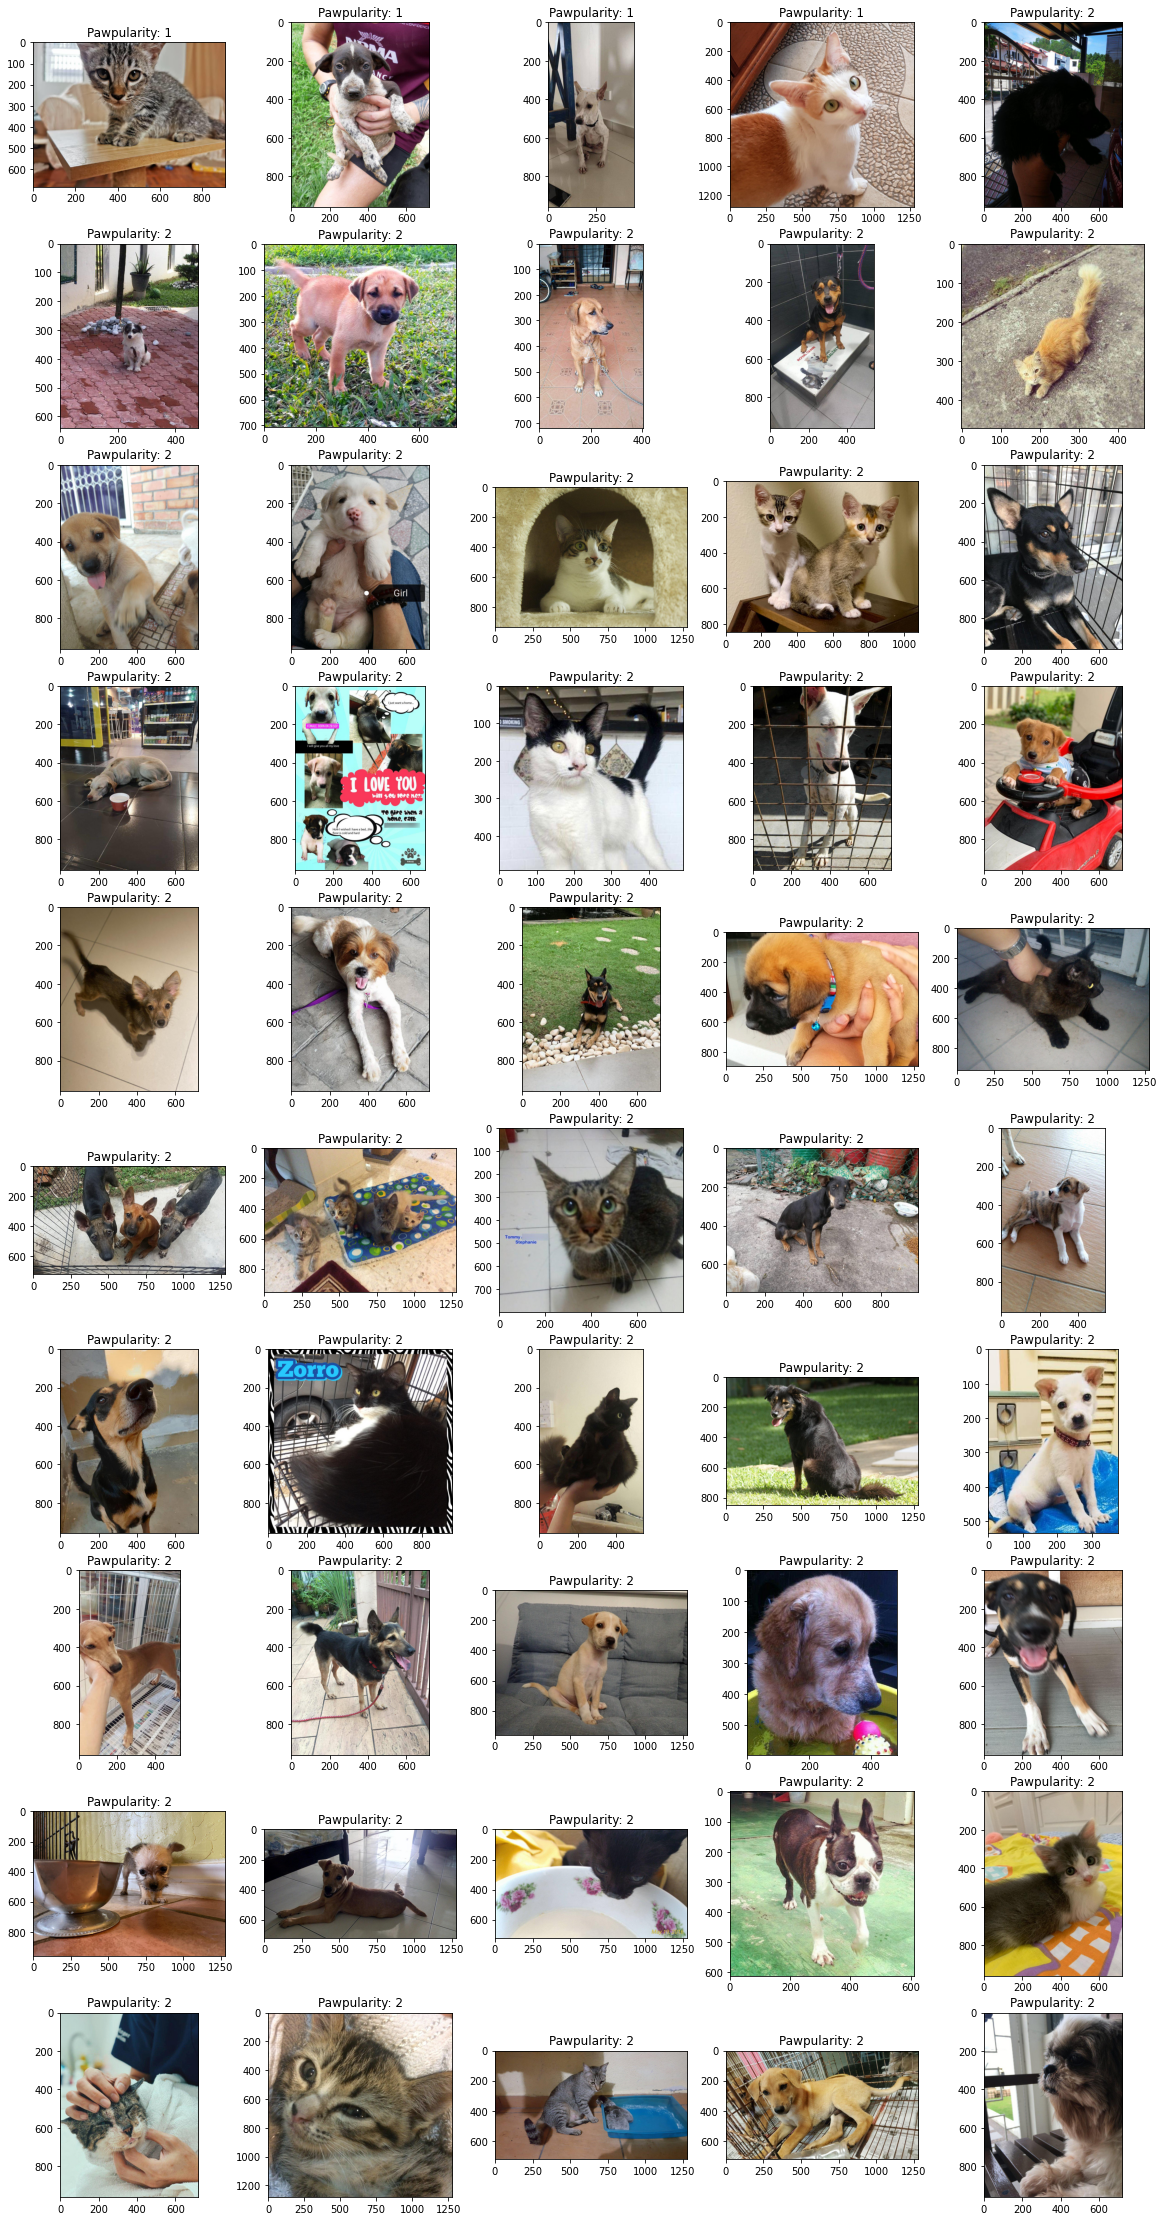

In [151]:
n_images = 50
n_cols = 5
n_rows = int(n_images / n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,40))

i = 0
for idx, record in df.sort_values('Pawpularity', ascending=True)[["Id", "Pawpularity"]].head(n_images).iterrows():
    img = Image.open(f"../data/train/{record.Id}.jpg")
    
    row, col = int(i / n_cols), i % n_cols
    
    ax[row, col].set_title(f"Pawpularity: {record.Pawpularity}")
    ax[row, col].imshow(img)
    
    i += 1

## Meta-data

In [69]:
df.corr()

Subject Focus      Eyes      Face      Near    Action  \
Subject Focus       1.000000  0.076794  0.038252  0.058672  0.014006   
Eyes                0.076794  1.000000  0.584484  0.133127 -0.020544   
Face                0.038252  0.584484  1.000000  0.139031 -0.012022   
Near                0.058672  0.133127  0.139031  1.000000 -0.027312   
Action              0.014006 -0.020544 -0.012022 -0.027312  1.000000   
Accessory           0.020619  0.052480  0.034788  0.030234  0.025377   
Group              -0.052150 -0.084975 -0.108022 -0.319107 -0.002432   
Collage            -0.038534  0.066361  0.050847 -0.263498 -0.004270   
Human              -0.075295  0.036046  0.024170  0.065215 -0.009429   
Occlusion          -0.076851  0.022143  0.013389 -0.009287 -0.010832   
Info               -0.040498  0.038179  0.024704 -0.146188 -0.017191   
Blur               -0.046407 -0.507323 -0.068198 -0.017566  0.012009   
Pawpularity        -0.009853 -0.006686  0.008018  0.001001 -0.001373   

               Accessory     Group   Collage     Human  Occlusion      Info  \
Subject Focus   0.020619 -0.052150 -0.038534 -0.075295  -0.076851 -0.040498   
Eyes            0.052480 -0.084975  0.066361  0.036046   0.022143  0.038179   
Face            0.034788 -0.108022  0.050847  0.024170   0.013389  0.024704   
Near            0.030234 -0.319107 -0.263498  0.065215  -0.009287 -0.146188   
Action          0.025377 -0.002432 -0.004270 -0.009429  -0.010832 -0.017191   
Accessory       1.000000 -0.057301  0.065860 -0.041745  -0.038912  0.075063   
Group          -0.057301  1.000000  0.132007 -0.104287   0.003568  0.063311   
Collage         0.065860  0.132007  1.000000  0.011476   0.054611  0.482141   
Human          -0.041745 -0.104287  0.011476  1.000000   0.634381  0.018171   
Occlusion      -0.038912  0.003568  0.054611  0.634381   1.000000  0.117725   
Info            0.075063  0.063311  0.482141  0.018171   0.117725  1.000000   
Blur           -0.035012  0.007899 -0.026591 -0.015941  -0.006338 -0.022604   
Pawpularity     0.013287  0.016469  0.001732  0.003983   0.001979 -0.004735   

                   Blur  Pawpularity  
Subject Focus -0.046407    -0.009853  
Eyes          -0.507323    -0.006686  
Face          -0.068198     0.008018  
Near          -0.017566     0.001001  
Action         0.012009    -0.001373  
Accessory     -0.035012     0.013287  
Group          0.007899     0.016469  
Collage       -0.026591     0.001732  
Human         -0.015941     0.003983  
Occlusion     -0.006338     0.001979  
Info          -0.022604    -0.004735  
Blur           1.000000    -0.023540  
Pawpularity   -0.023540     1.000000